In [1]:
#Import libraries
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt


C:\Users\User\AppData\Local\Temp\ipykernel_14596\1241710215.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Haversine function
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 
    return c * r 

In [3]:
#Read data
data = pd.read_csv('RawData.csv')
data.head()


,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites
0,1.736173,65.045697,25.438311,27.517720,45.0,0.11,0.000000,0.001928,7.0,12.0,28.0
1,2.745902,65.045680,25.438308,25.517727,43.0,0.15,0.000000,0.006551,8.5,14.0,24.0
2,3.753345,65.045684,25.438210,39.517715,57.0,0.78,0.000000,0.010706,7.5,13.0,26.0
3,4.742809,65.045674,25.438296,37.517728,55.0,0.83,180.100006,0.012798,4.5,9.0,27.0
4,5.751798,65.045675,25.438340,34.517732,52.0,0.87,169.600006,0.014405,3.5,7.0,28.0


In [ ]:
%pip install folium

In [4]:
#Derive velocity using haversine
lat = data['Latitude (°)'] #Latitude
lon = data['Longitude (°)'] #Longitude

data['dist'] = np.zeros(lat.shape[0]) 
data['time_diff']  = np.zeros(lat.shape[0]) 

for i in range(lat.shape[0]-1): 
  data['dist'][i] = haversine(lon[i], lat[i],lon[i+1], lat[i+1])*1000 
  data['time_diff'][i] = data['Time (s)'][i+1] - data['Time (s)'][i]  

data['dist'][0] = 0
data['velocity'] = data['dist']/data['time_diff']

data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_14596\274537123.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['dist'][i] = haversine(lon[i], lat[i],lon[i+1], lat[i+1])*1000 #The distance between data points with indices i ja i + 1 (in

,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites,dist,time_diff,velocity
0,1.736173,65.045697,25.438311,27.517720,45.0,0.11,0.000000,0.001928,7.0,12.0,28.0,0.000000,1.009729,0.000000
1,2.745902,65.045680,25.438308,25.517727,43.0,0.15,0.000000,0.006551,8.5,14.0,24.0,4.623118,1.007443,4.588962
2,3.753345,65.045684,25.438210,39.517715,57.0,0.78,0.000000,0.010706,7.5,13.0,26.0,4.154938,0.989464,4.199180
3,4.742809,65.045674,25.438296,37.517728,55.0,0.83,180.100006,0.012798,4.5,9.0,27.0,2.092020,1.008990,2.073381
4,5.751798,65.045675,25.438340,34.517732,52.0,0.87,169.600006,0.014405,3.5,7.0,28.0,1.606683,0.990383,1.622285


(0.0, 140.0, 0.0, 8.0)

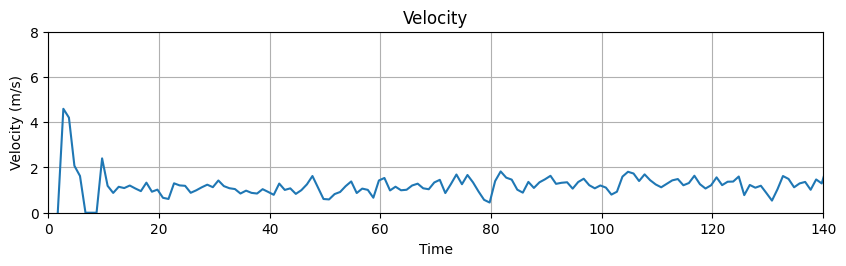

In [8]:
import matplotlib.pyplot as plt

# velocity plot
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(data['Time (s)'],data['velocity'])
plt.grid()
plt.title('Velocity')
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.axis([0, 140, 0, 8])


Text(0, 0.5, 'Distance (km)')

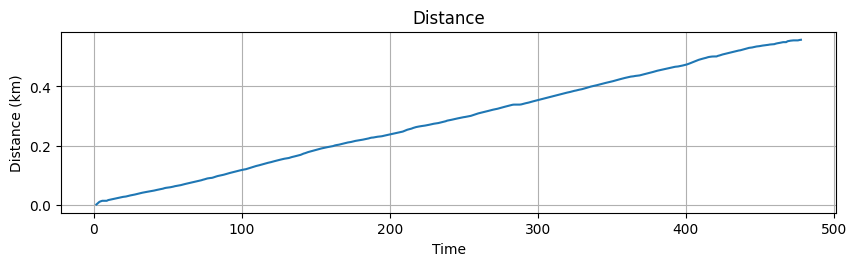

In [9]:
# distance plot
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(data['Time (s)'],data['Distance (km)'])
plt.grid()
plt.title('Distance')
plt.xlabel('Time')
plt.ylabel('Distance (km)')


Text(0, 0.5, 'Satellites')

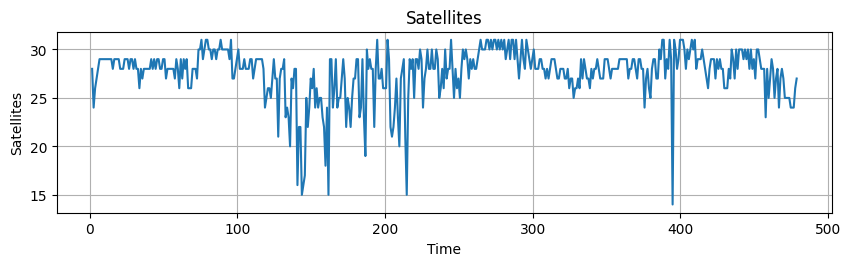

In [10]:
# satellite count plot
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(data['Time (s)'],data['Satellites'])
plt.grid()
plt.title('Satellites')
plt.xlabel('Time')
plt.ylabel('Satellites')



In [10]:
import folium 
my_map = folium.Map(location=[np.mean(data['Latitude (°)']), np.mean(data['Longitude (°)'])], zoom_start=16)

folium.PolyLine(data[['Latitude (°)','Longitude (°)']], color="blue", weight=2.5, opacity=1).add_to(my_map)

# Save map
my_map.save("shovan_map.html")
my_map

In [ ]:
np.mean(data['Latitude (°)'])